<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [154]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Objetivo: Predecir el valor medio de las propiedades en California
Variable objetivo: medianhousevalue
Características: 8 variables numéricas y 1 categórica

Estadísticas descriptivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  2064

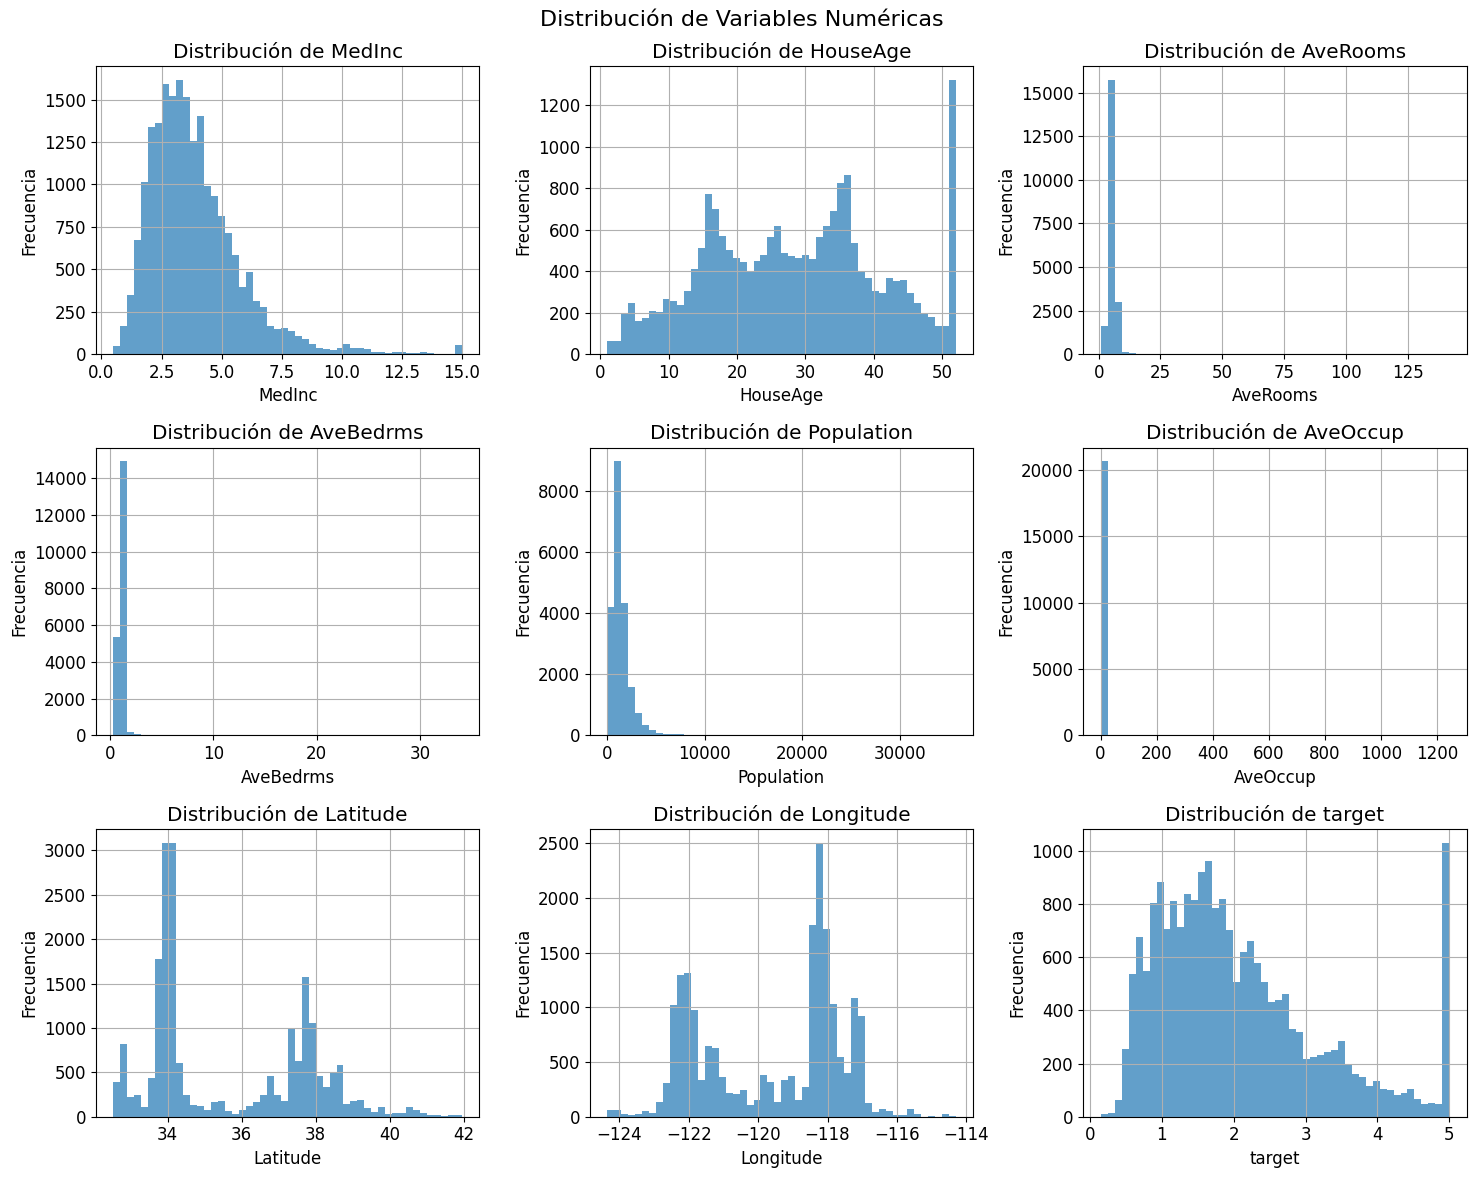

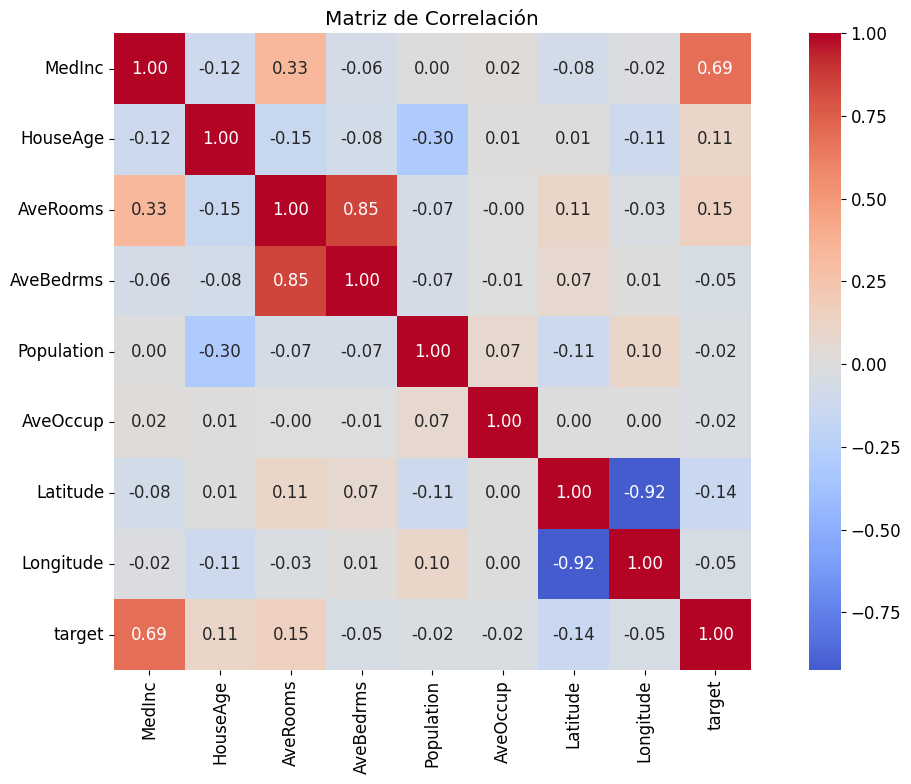

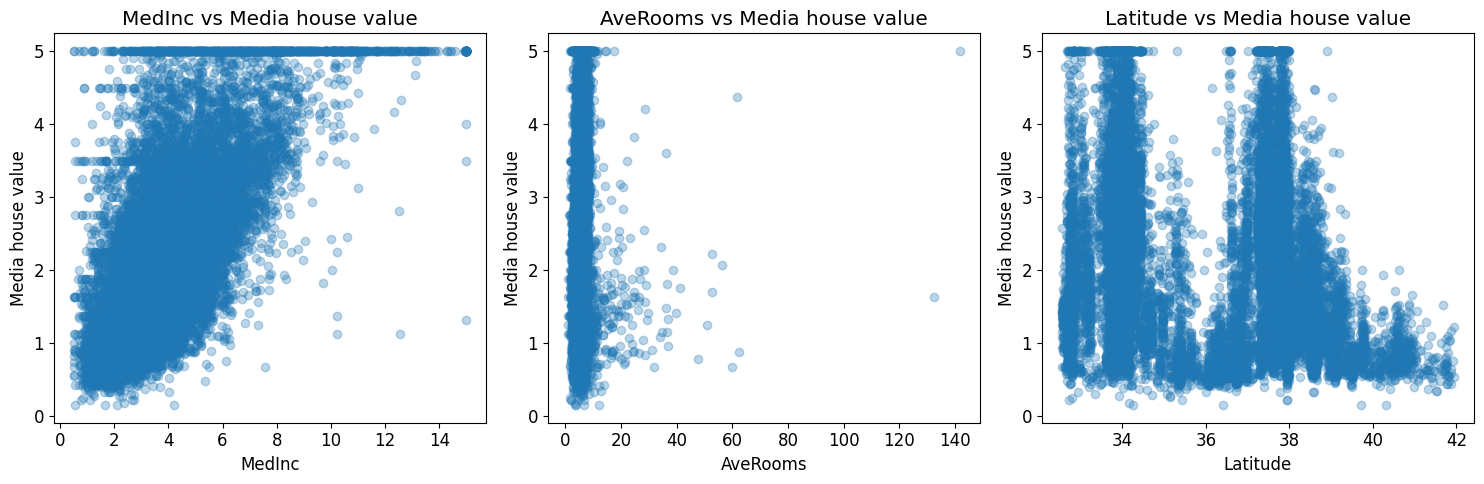

Valores nulos antes del preprocesamiento:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
No hay valores nulos en el dataset

Número de outliers por variable (método IQR):
MedInc         681
HouseAge         0
AveRooms       511
AveBedrms     1424
Population    1196
AveOccup       711
Latitude         0
Longitude        0
target        1071
dtype: int64

Dimensiones de los conjuntos:
Entrenamiento: (16512, 8)
Prueba: (4128, 8)
Resultados de Linear Regression:
      mae     mse    rmse     mape   smape
0  0.5332  0.5559  0.7456  31.9522  0.4843
Resultados de Decision Tree:
      mae     mse    rmse     mape   smape
0  0.4332  0.4155  0.6446  24.9875  0.3998
Resultados de Random Forest:
      mae     mse    rmse     mape   smape
0  0.3663  0.2965  0.5445  21.5703  0.3549
Resultados de Support Vector Regression:
      mae    mse    rmse     mape   smape
0  0.3986  0.357  0.5975  21

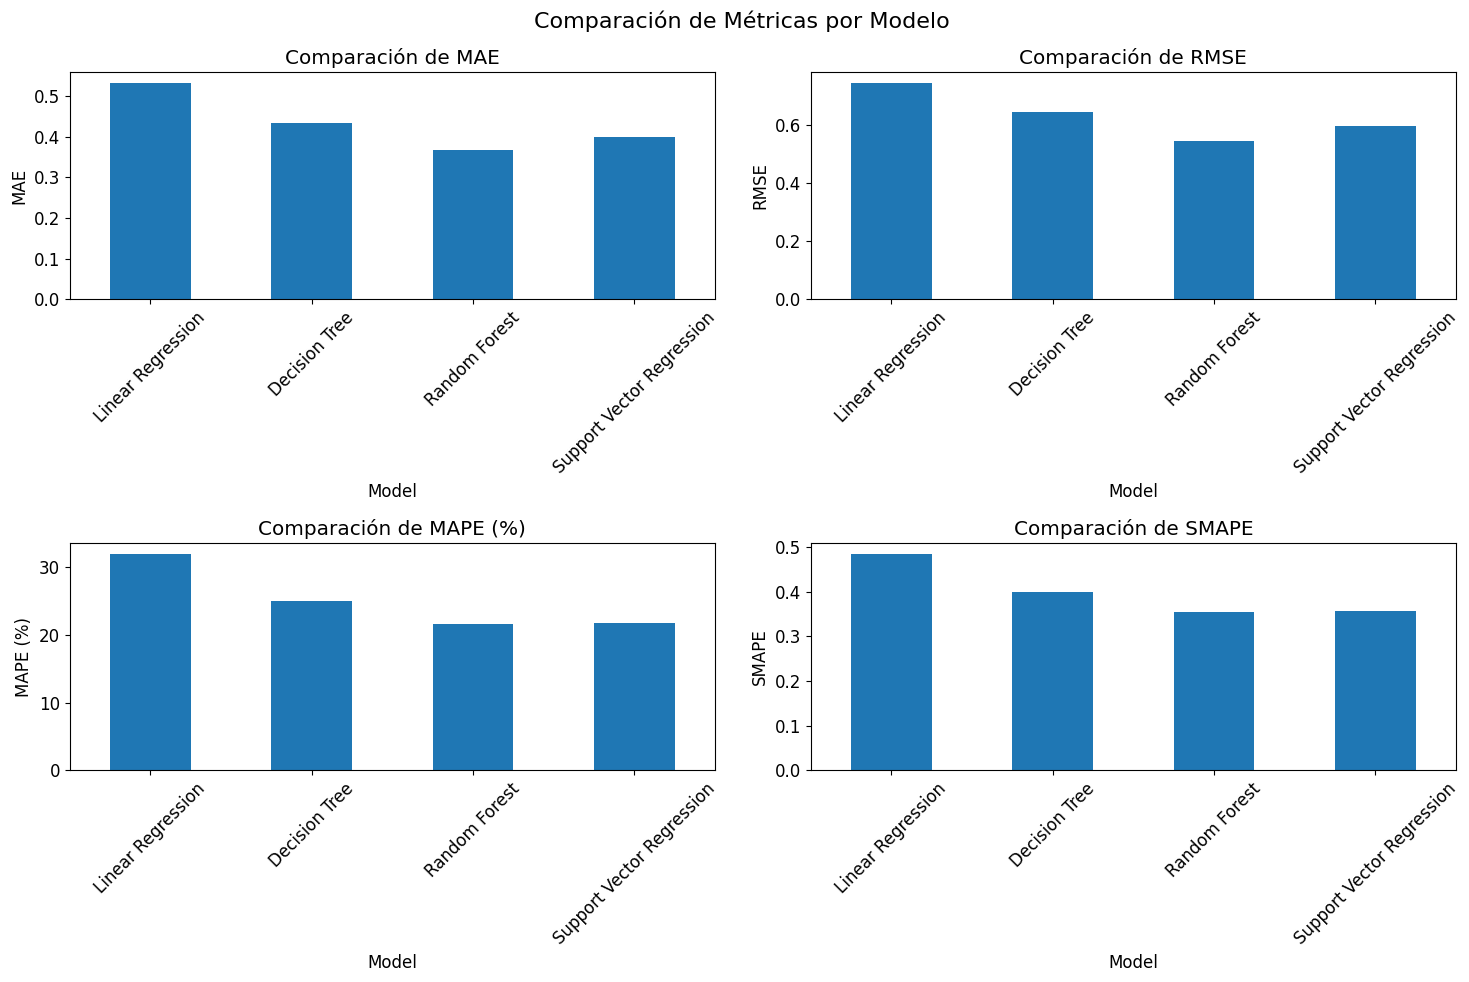

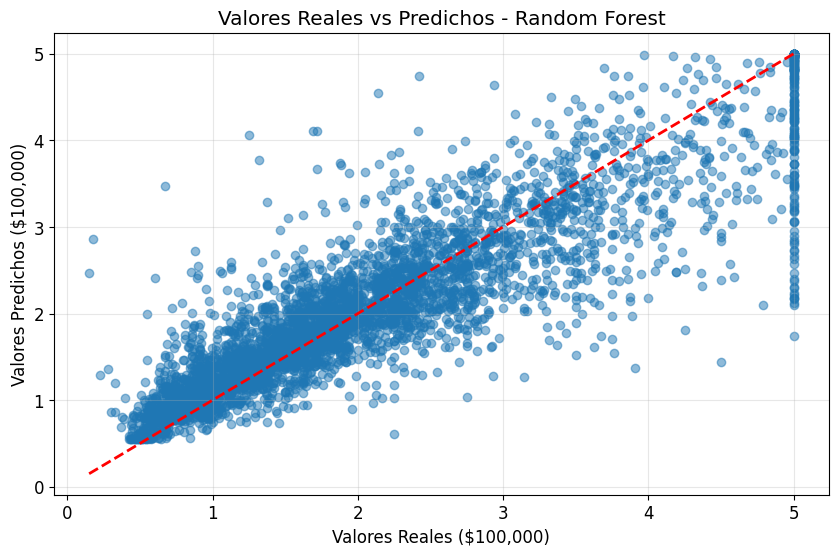

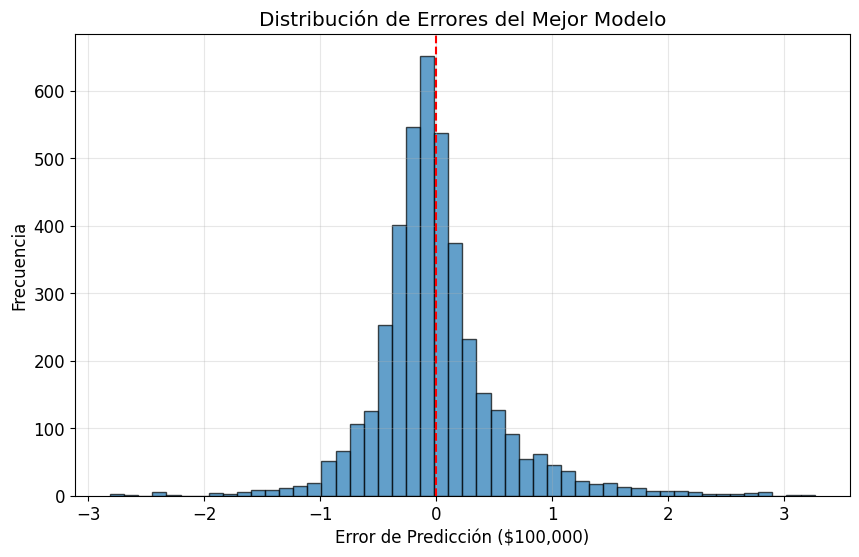

RESUMEN DEL ANÁLISIS:
- Se analizaron 20640 propiedades con 8 características
- El mejor modelo fue: Random Forest
- Error RMSE del mejor modelo: 0.5445 (en unidades de $100,000)

CARACTERÍSTICAS MÁS IMPORTANTES:
      feature  importance
0      MedInc    0.593805
5    AveOccup    0.139759
6    Latitude    0.076593
7   Longitude    0.076106
1    HouseAge    0.047921
2    AveRooms    0.031539
4  Population    0.017260
3   AveBedrms    0.017017


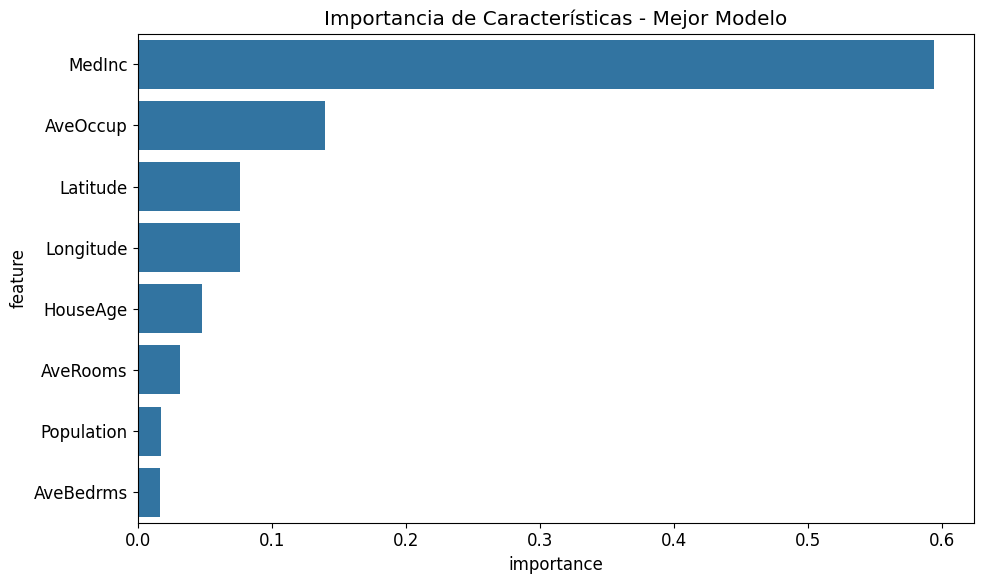

In [137]:
print("Objetivo: Predecir el valor medio de las propiedades en California")
print("Variable objetivo: medianhousevalue")
print("Características: 8 variables numéricas y 1 categórica")
print()
print("Estadísticas descriptivas:")
print(housing.describe())
print("\nValores nulos por columna:")
print(housing.isnull().sum())
print()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)


numeric_columns = housing.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_columns[:9]):
    if i < 9:
        ax = axes[i//3, i%3]
        housing[col].hist(bins=50, ax=ax, alpha=0.7)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = housing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

top_corr_features = correlation_matrix['target'].abs().sort_values(ascending=False).index[1:4]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(housing[feature], housing['target'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Media house value')
    plt.title(f'{feature} vs Media house value')
plt.tight_layout()
plt.show()



print("Valores nulos antes del preprocesamiento:")
print(housing.isnull().sum())

if housing.isnull().sum().sum() > 0:
    housing = housing.fillna(housing.median())
    print("\nValores nulos después del preprocesamiento:")
    print(housing.isnull().sum())
else:
    print("No hay valores nulos en el dataset")

Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1
outliers = ((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).sum()
print(f"\nNúmero de outliers por variable (método IQR):")
print(outliers)

X = housing.drop('target', axis=1)
y = housing['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDimensiones de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Support Vector Regression': SVR(C=1.0, kernel='rbf')
}

results = {}

for name, model in models.items():

    if name == 'Linear Regression' or name == 'Support Vector Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    metrics_df = pd.DataFrame({'y': y_test, 'yhat': y_pred})
    model_metrics = regression_metrics(metrics_df)
    results[name] = model_metrics
    print(f"Resultados de {name}:")
    print(model_metrics)


all_results = pd.concat(results, axis=0)
all_results.index = all_results.index.droplevel(1)
all_results = all_results.reset_index().rename(columns={'index': 'Model'})

print("Comparación de todos los modelos:")
print(all_results)

best_model_idx = all_results['rmse'].idxmin()
best_model = all_results.loc[best_model_idx, 'Model']
best_rmse = all_results.loc[best_model_idx, 'rmse']

print(f"\nMEJOR MODELO: {best_model}")
print(f"RMSE: {best_rmse}")



fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de Métricas por Modelo', fontsize=16)

metrics_to_plot = ['mae', 'rmse', 'mape', 'smape']
metric_names = ['MAE', 'RMSE', 'MAPE (%)', 'SMAPE']

for i, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[i//2, i%2]
    all_results.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'Comparación de {name}')
    ax.set_ylabel(name)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

best_model_instance = models[best_model]
if best_model == 'Linear Regression' or best_model == 'Support Vector Regression':
    y_pred_best = best_model_instance.predict(X_test_scaled)
else:
    y_pred_best = best_model_instance.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales ($100,000)')
plt.ylabel('Valores Predichos ($100,000)')
plt.title(f'Valores Reales vs Predichos - {best_model}')
plt.grid(True, alpha=0.3)
plt.show()

errors = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Error de Predicción ($100,000)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores del Mejor Modelo')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

print("RESUMEN DEL ANÁLISIS:")
print(f"- Se analizaron {housing.shape[0]} propiedades con {housing.shape[1]-1} características")
print(f"- El mejor modelo fue: {best_model}")
print(f"- Error RMSE del mejor modelo: {best_rmse} (en unidades de $100,000)")

if hasattr(best_model_instance, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_instance.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nCARACTERÍSTICAS MÁS IMPORTANTES:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Importancia de Características - Mejor Modelo')
    plt.tight_layout()
    plt.show()

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [138]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [139]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [140]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [141]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [142]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [143]:
print("Distribucion de los datos ", digits['target'].value_counts().sort_index())
print("Uso de memoria: ",digits.memory_usage(deep=True).sum() / (1024*1024))

Distribucion de los datos  target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64
Uso de memoria:  0.8912773132324219


Todas las variables del dataframe digits son enteros. Hay cerca de 180 registros por clase. Todos los valores estan en el rango esperado.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [144]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

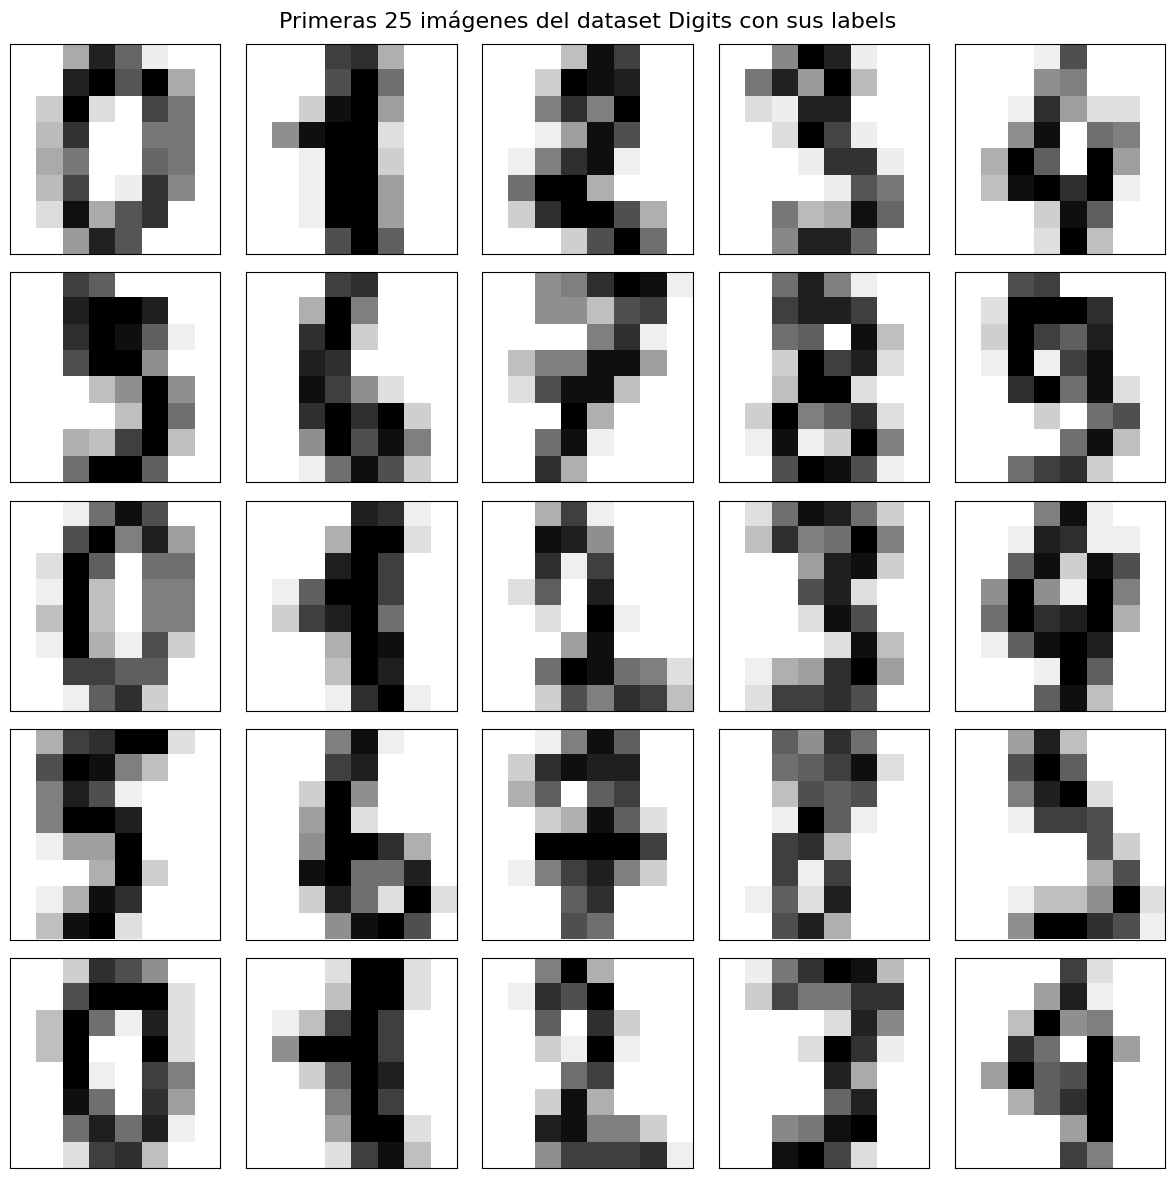

In [145]:
# Parámetros de la grilla
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i, ax in enumerate(axs.ravel()[:25]):
    image = digits_dict["images"][i]

    label = digits_dict["target"][i]

    ax.imshow(image, cmap="gray_r")

    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Primeras 25 imágenes del dataset Digits con sus labels", fontsize=16)
plt.tight_layout()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [146]:
from sklearn.preprocessing import StandardScaler

# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape[0])
print("Tamaño de testeo:", X_test.shape[0])

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

Tamaño de entrenamiento: 1437
Tamaño de testeo: 360


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

model_log = LogisticRegression(max_iter=2000, solver="lbfgs", multi_class="multinomial")
model_knn = KNeighborsClassifier(n_neighbors=3)
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)

models = {
    "Logistic Regression": model_log,
    "KNN (k=3)": model_knn,
    "Random Forest": model_rf,
}


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



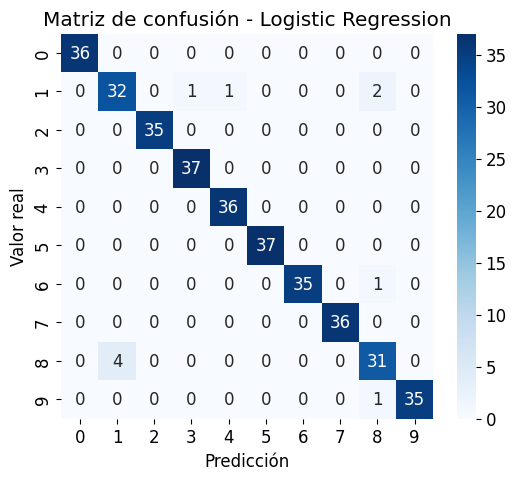


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



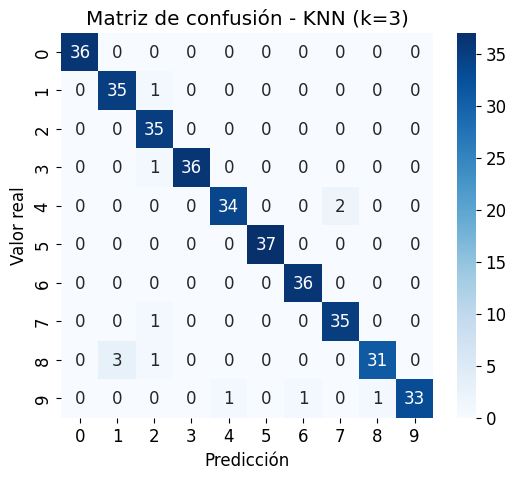


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      0.97      0.95        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



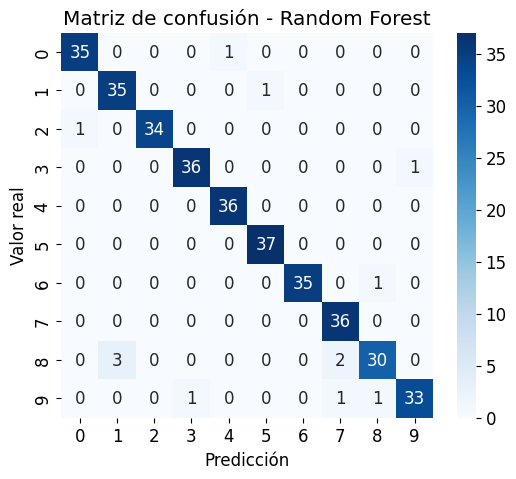


Resultados comparativos:
                     accuracy  precision    recall        f1  \
Logistic Regression  0.972222   0.972126  0.971905  0.971940   
KNN (k=3)            0.966667   0.967759  0.966424  0.966304   
Random Forest        0.963889   0.964407  0.963488  0.963391   

                     tiempo_entrenamiento (s)  
Logistic Regression                  0.315564  
KNN (k=3)                            0.002292  
Random Forest                        1.561386  


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time

results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train_s, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test_s)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

    results[name] = {"accuracy": acc,"precision": prec,"recall": rec,"f1": f1,"tiempo_entrenamiento (s)": train_time,
    }

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.show()

import pandas as pd
df_results = pd.DataFrame(results).T
print("\nResultados comparativos:")
print(df_results)

El dataset permite una clasificación muy precisa con todos los modelos.
El mejor modelo depende, Random Forest ofrece el mayor desempeño global, mientras que Regresión Logística es más rápida y simple. KNN es una opcion cuando el k es conveniente.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.


Mejor clasificador según F1 (macro): Logistic Regression


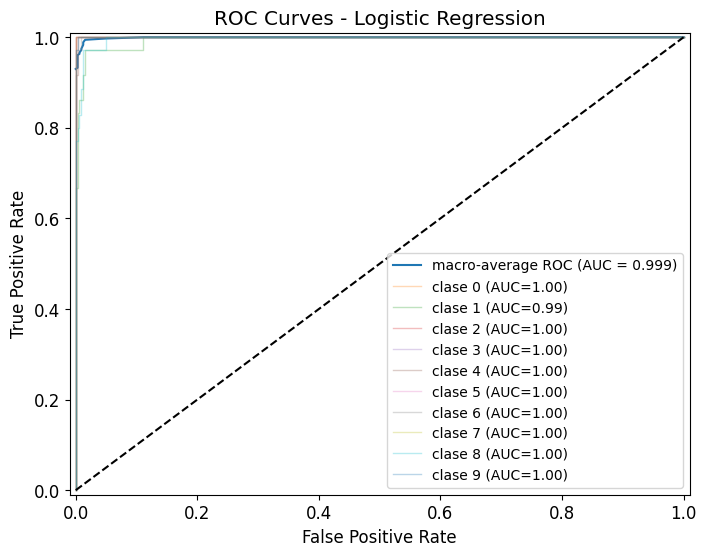

In [149]:
best_clf_name = df_results['f1'].idxmax()
print('\nMejor clasificador según F1 (macro):', best_clf_name)
best_clf = models[best_clf_name]


n_classes = len(np.unique(y))
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

if hasattr(best_clf, 'predict_proba'):
  y_score = best_clf.predict_proba(X_test_s)
else:
  if hasattr(best_clf, 'decision_function'):
    y_score = best_clf.decision_function(X_test_s)
  else:

    preds = best_clf.predict(X_test_s)
    y_score = np.eye(n_classes)[preds]


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])



all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
plt.plot(fpr['macro'], tpr['macro'], label='macro-average ROC (AUC = %0.3f)' % roc_auc['macro'])
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], lw=1, alpha=0.3, label=f'clase {i} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves - {best_clf_name}')
plt.legend(loc='lower right', fontsize='small')
plt.show()

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [150]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"


    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]


    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()


1. Predicciones correctas:


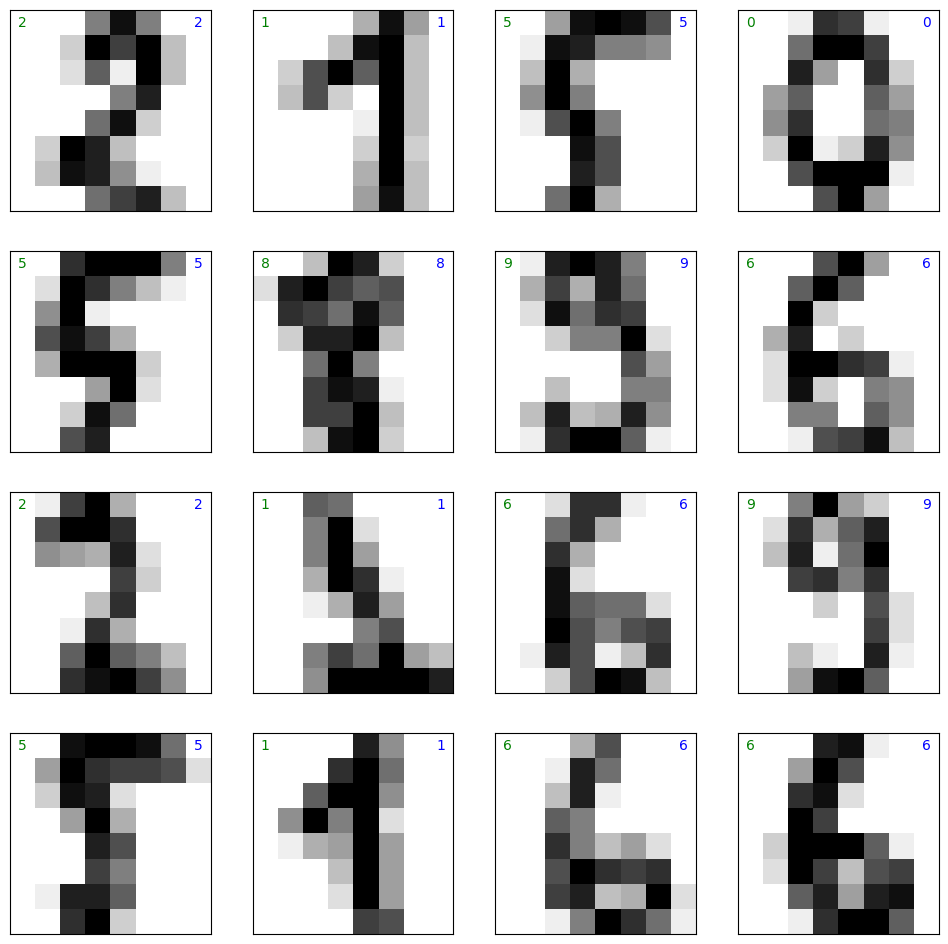


2. Predicciones incorrectas:


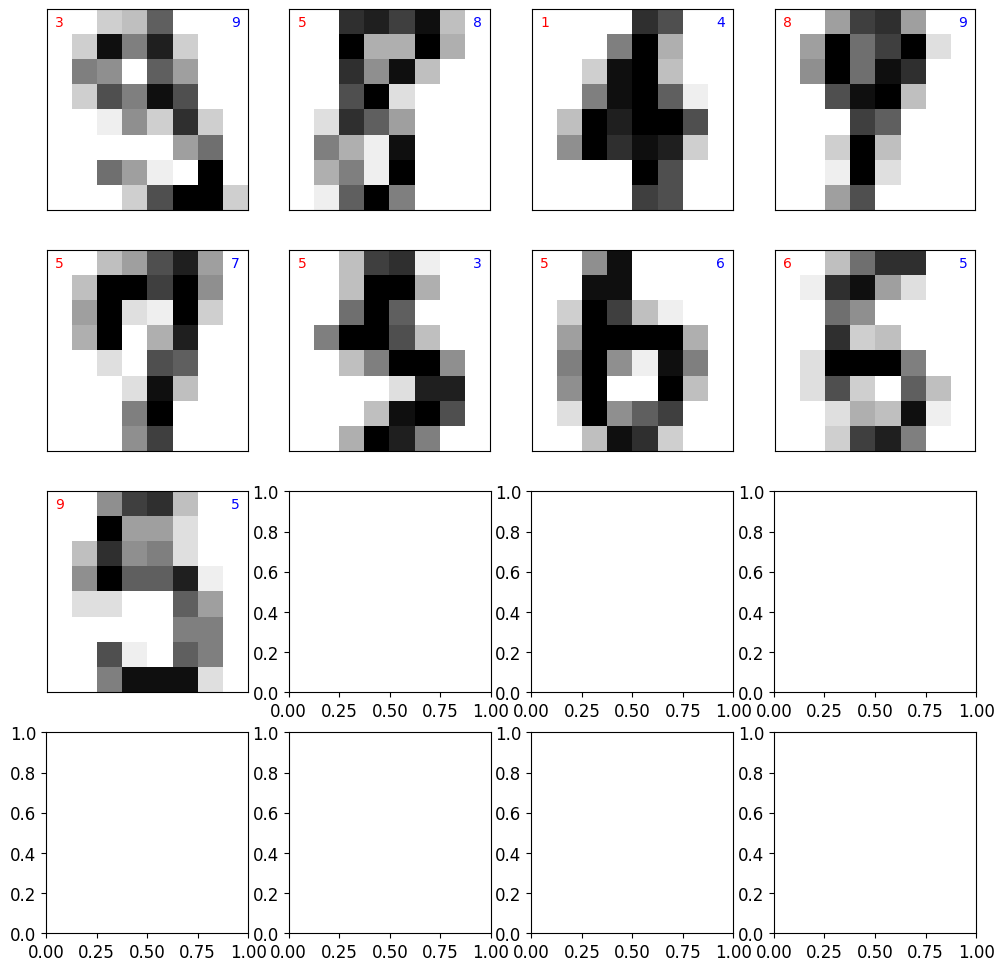

In [151]:
print("\n1. Predicciones correctas:")
mostrar_resultados(digits, best_clf, nx=4, ny=4, label="correctos")

print("\n2. Predicciones incorrectas:")
mostrar_resultados(digits, best_clf, nx=4, ny=4, label="incorrectos")



**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Estas fallas ocurren por ruido en las imagenes originales, por diferentes tipos de escrituras, formas similares.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El modelo de Regresión Logística demostró el mejor desempeño en términos de la métrica F1-score, aunque las diferencias con los otros algoritmos no fueron particularmente significativas.
 Las curvas ROC evidenciaron capacidades discriminativas variables entre las diferentes clases. Mientras algunos dígitos no tuvieron problemas de clasificación, otros como el 3 y 8, o el 1 y 7, mostraron tendencias de confusión recurrentes. Esto sugiere limitaciones inherentes en la representación de ciertos patrones numéricos.